## Address and PC Experiments

In all experiments, I ran the bzip2 program with 100,000,000 instructions

In [9]:
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
ADDRESS_FILE_1 = "../../spec_stats/address_pc_experiment/address.out.1"
PC_FILE_1 = "../../spec_stats/address_pc_experiment/pc.out.1"
ADDRESS_FILE_2 = "../../spec_stats/address_pc_experiment/address.out.2"
PC_FILE_2 = "../../spec_stats/address_pc_experiment/pc.out.2"

In [42]:
addresses_1 = [int(val) for val in open(ADDRESS_FILE_1).read().splitlines()]
pcs_1 = [int(val) for val in open(PC_FILE_1).read().splitlines()]
addresses_2 = [int(val) for val in open(ADDRESS_FILE_2).read().splitlines()]
pcs_2 = [int(val) for val in open(PC_FILE_2).read().splitlines()]

Q: How often does a program counter go back to the same address?

A: quite frequently

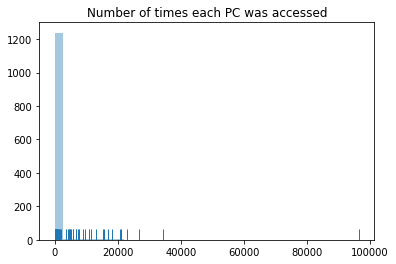

In [36]:
pc_counts = list(Counter(pcs_1).values())
sns.distplot(pc_counts, kde=False, rug=True)
plt.title("Number of times each PC was accessed")
plt.show()

Q: Do PCs increase throughout program?

A: **no** for the most part the PC is actually decreasing???

In [51]:
increased = 0
for i in range(1, len(pcs_1)):
  if pcs_1[i] > pcs_1[i - 1]:
    increased += 1
print(increased / len(pcs_1))

0.2498988103717673


In [39]:
total_pcs = len(set(pcs_1))
n_pcs_multiple = sum(1 for x in pc_counts if x > 1)
print("Percent of PCs with multiple calls:", 100 * n_pcs_multiple / total_pcs)

Percent of PCs with multiple calls: 17.4565560821485


Q: How long should our training period be? Can we figure out a cutoff where a large ratio of addresses have already been seen?

A: Unfortunately with 100,000,000 instructions this looks largely linear.

In [24]:
total_addresses = len(set(addresses_1))
seen_so_far = set()
seen_at_timestep = []
for address in addresses_1:
  seen_so_far.add(address)
  seen_at_timestep.append(len(seen_so_far))

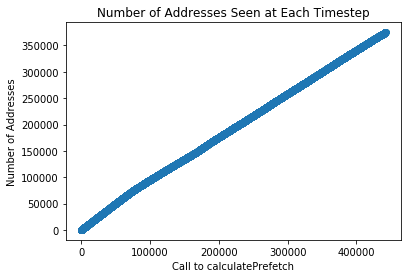

In [40]:
ax = sns.scatterplot(list(range(len(addresses_1))), seen_at_timestep, linewidth=0)
ax.set(xlabel='Call to calculatePrefetch', ylabel='Number of Addresses')
plt.title("Number of Addresses Seen at Each Timestep")
plt.show()

In [54]:
diffs_so_far = set()
diffs_seen_at_timestep = [0]
for i in range(1, len(addresses_1)):
  diffs_so_far.add(addresses_1[i] - addresses_1[i - 1])
  diffs_seen_at_timestep.append(len(diffs_so_far))

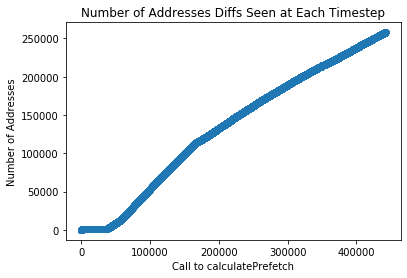

In [55]:
ax = sns.scatterplot(list(range(len(addresses_1))), diffs_seen_at_timestep, linewidth=0)
ax.set(xlabel='Call to calculatePrefetch', ylabel='Number of Addresses')
plt.title("Number of Addresses Diffs Seen at Each Timestep")
plt.show()

Q: If we run the program twice, is the program counter the same?

A: Between two runs, we see > 50% overlap in PCs (overall)

In [47]:
overlap = set(pcs_1).intersection(set(pcs_2))
total = set(pcs_1).union(set(pcs_2))
print("Amount of overlap in PCs:", len(overlap) / len(total))

Amount of overlap in PCs: 0.6624671916010498


Q: If we run the program twice, are the memory addresses the same?

A: Between two runs, we see > 90% overlap in memory addresses (overall)\
This suggests that there is a strong relationship and I think we can assume that there is overlap generally.

In [50]:
overlap = set(addresses_1).intersection(set(addresses_2))
total = set(addresses_1).union(set(addresses_2))
print("Amount of overlap in addresses:", len(overlap) / len(total))

Amount of overlap in addresses: 0.915083519810787
